<a href="https://colab.research.google.com/github/RAHUL-REDDY-A/ML/blob/main/ML_LAB_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Function to load and preprocess the dataset
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)

    # Drop rows with missing values
    df = df.dropna()

    # Encode target column if it's categorical
    target_encoder = LabelEncoder()
    df['Mental_Health_Condition'] = target_encoder.fit_transform(df['Mental_Health_Condition'])

    # List of preferred features
    preferred_features = ['Sleep_Hours', 'Work_Hours', 'Stress_Level', 'Social_Media_Usage']

    # Use only features that are present in the dataset
    selected_features = [feat for feat in preferred_features if feat in df.columns]

    # Extract feature and target
    X = df[selected_features].copy()
    y = df['Mental_Health_Condition']

    # Encode non-numeric features
    for col in X.columns:
        if X[col].dtype == 'object':
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])

    return X, y

# Function to train KNN classifier
def train_knn_classifier(X_train, y_train, k=5):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

# Function to evaluate the classifier
def evaluate_classifier(model, X, y_true):
    y_pred = model.predict(X)
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    return conf_matrix, precision, recall, f1

# Load and preprocess
X, y = load_and_preprocess_data('MHDS.csv')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
knn_model = train_knn_classifier(X_train, y_train, k=5)

# Evaluate on training set
train_conf_matrix, train_precision, train_recall, train_f1 = evaluate_classifier(knn_model, X_train, y_train)

# Evaluate on test set
test_conf_matrix, test_precision, test_recall, test_f1 = evaluate_classifier(knn_model, X_test, y_test)

# Print metrics
print("=== Training Data ===")
print("Confusion Matrix:\n", train_conf_matrix)
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\n=== Test Data ===")
print("Confusion Matrix:\n", test_conf_matrix)
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")

# Inference
if abs(train_f1 - test_f1) < 0.1:
    print("\nModel Outcome: Regular Fit")
elif train_f1 > test_f1:
    print("\nModel Outcome: Overfit")
else:
    print("\nModel Outcome: Underfit")


=== Training Data ===
Confusion Matrix:
 [[6066 2717]
 [2738 5977]]
Precision: 0.69
Recall: 0.69
F1 Score: 0.69

=== Test Data ===
Confusion Matrix:
 [[1810 1902]
 [1928 1860]]
Precision: 0.49
Recall: 0.49
F1 Score: 0.49

Model Outcome: Overfit


A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. Analyse the results.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load and clean data
def load_regression_data(file_path, target_col):
    df = pd.read_csv(file_path)

    # Drop rows where target or any input is NaN
    df = df.dropna(subset=[target_col])  # Drop rows with NaN in target

    # Encode target if it's categorical
    if df[target_col].dtype == 'object':
        encoder = LabelEncoder()
        df[target_col] = encoder.fit_transform(df[target_col])
        print(f"Target encoding: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}")

    X = df.drop(columns=[target_col]).select_dtypes(include=[np.number]).dropna()
    y = df.loc[X.index, target_col]  # Ensure matching indices

    return X, y

# Train model
def train_regression_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Evaluate model
def evaluate_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mape, r2

# Main
X, y = load_regression_data('/content/MHDS.csv', target_col='Severity')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg_model = train_regression_model(X_train, y_train)

# Evaluate model
mse, rmse, mape, r2 = evaluate_regression_model(reg_model, X_test, y_test)

# Print results
print("\n--- Regression Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R² Score: {r2:.4f}")


Target encoding: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}

--- Regression Evaluation ---
Mean Squared Error (MSE): 0.6715
Root Mean Squared Error (RMSE): 0.8195
Mean Absolute Percentage Error (MAPE): 1525637055294901.5000
R² Score: 0.0001


A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 - Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class color. Observe the plot.

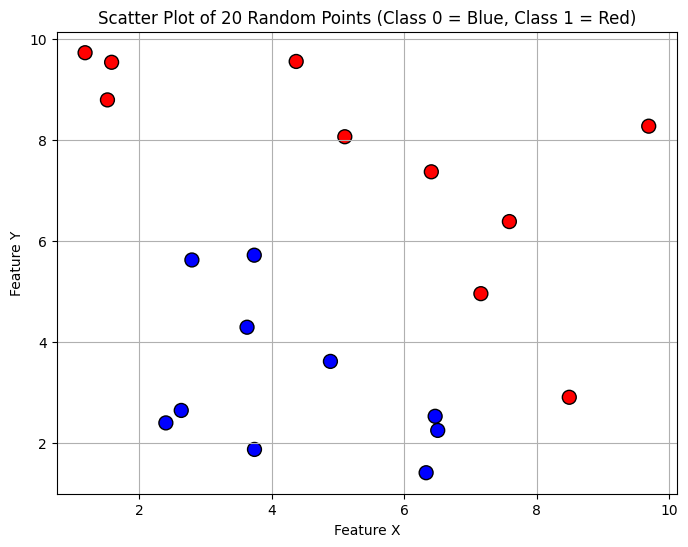

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 20 random (X, Y) points between 1 and 10
np.random.seed(42)  # for reproducibility
X = np.random.uniform(1, 10, size=(20, 2))  # 20 points, 2 features

# Step 2: Assign class labels manually based on a rule
# Example rule: if x + y > 10 → class 1 (Red), else → class 0 (Blue)
labels = np.where(X[:, 0] + X[:, 1] > 10, 1, 0)

# Step 3: Scatter plot with color by class
colors = ['blue' if label == 0 else 'red' for label in labels]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', s=100)
plt.title("Scatter Plot of 20 Random Points (Class 0 = Blue, Class 1 = Red)")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.grid(True)
plt.show()

A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. This creates a test set of about 10,000 points. Classify these points with above training data using kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread and class boundary lines in the feature space.

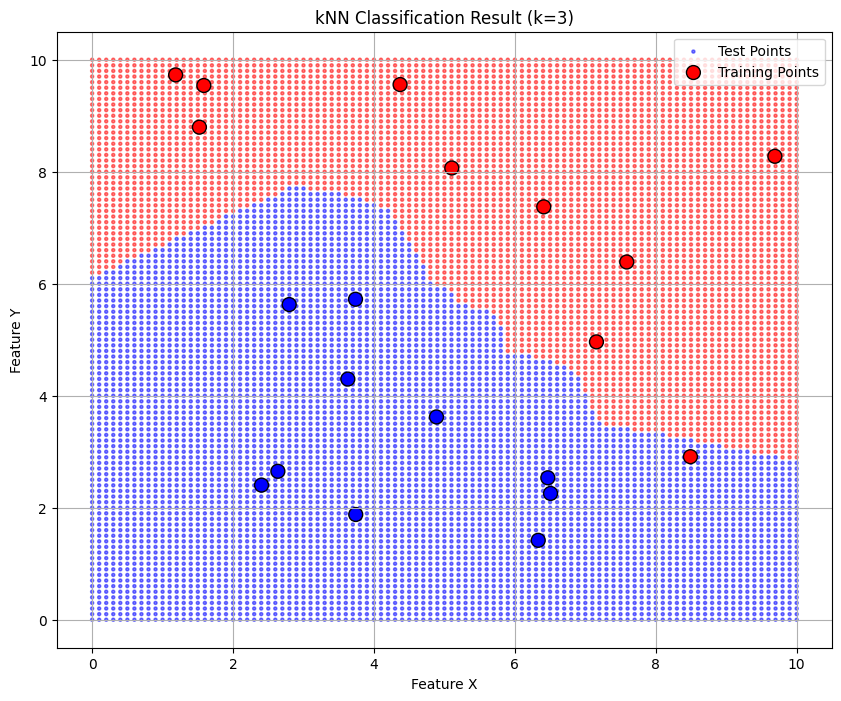

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Use the training data from A3
np.random.seed(42)
X_train = np.random.uniform(1, 10, size=(20, 2))
y_train = np.where(X_train[:, 0] + X_train[:, 1] > 10, 1, 0)

# Generate test set grid (0 to 10, step 0.1)
x_vals = np.arange(0, 10.1, 0.1)
y_vals = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_vals, y_vals)
X_test = np.c_[xx.ravel(), yy.ravel()]  # shape ~ (10,000, 2)

# Train kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict classes for test grid
y_pred = knn.predict(X_test)

# Plot predicted test points
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=['blue' if p == 0 else 'red' for p in y_pred], s=5, alpha=0.5, label='Test Points')
plt.scatter(X_train[:, 0], X_train[:, 1], c=['blue' if l == 0 else 'red' for l in y_train], edgecolor='k', s=100, marker='o', label='Training Points')
plt.title("kNN Classification Result (k=3)")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.grid(True)
plt.legend()
plt.show()


A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

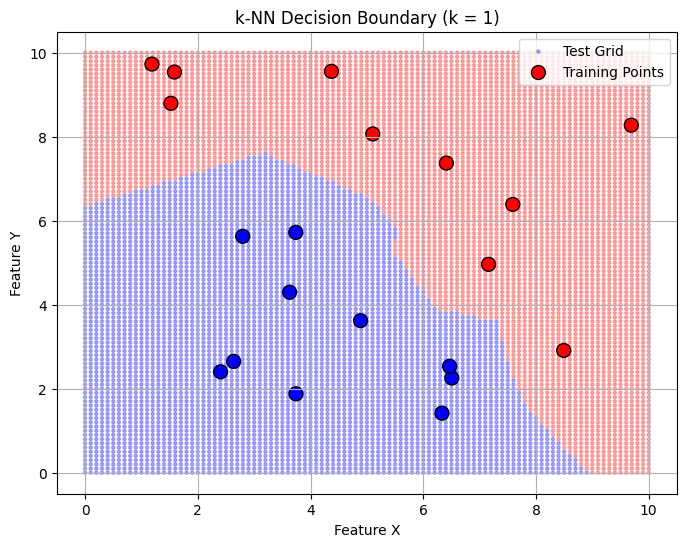

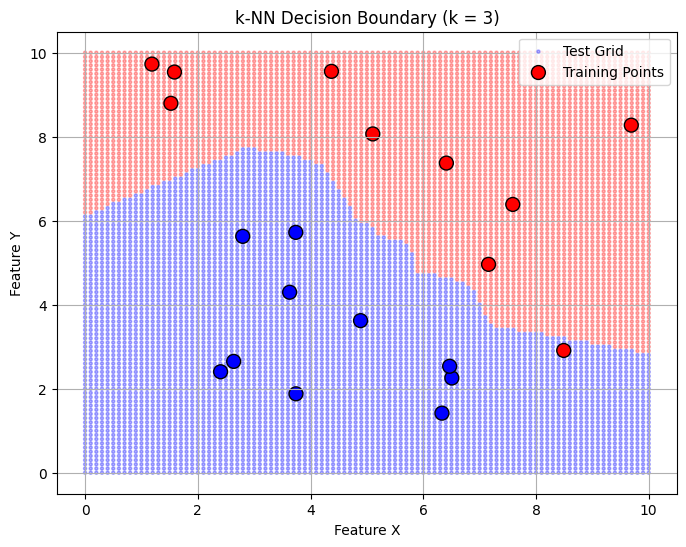

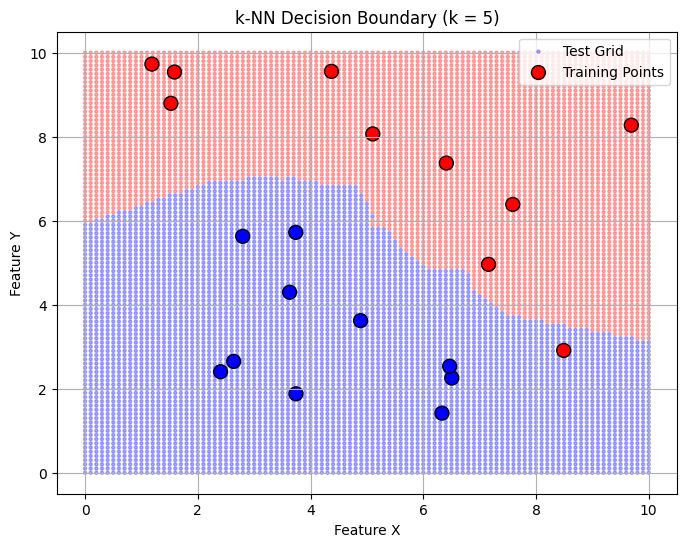

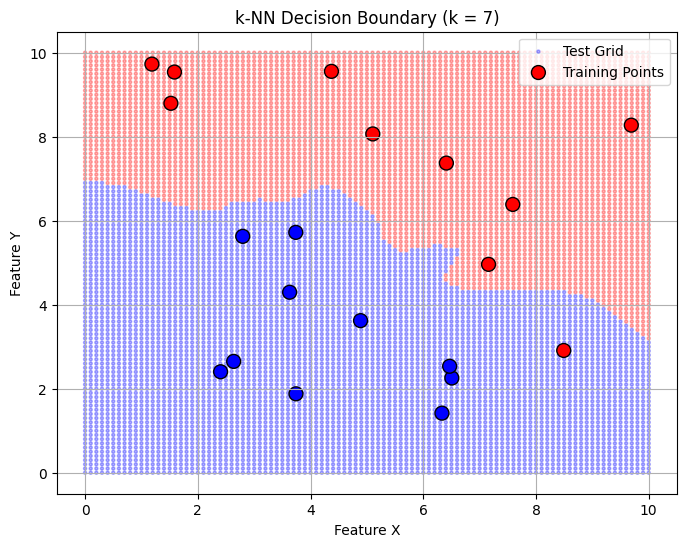

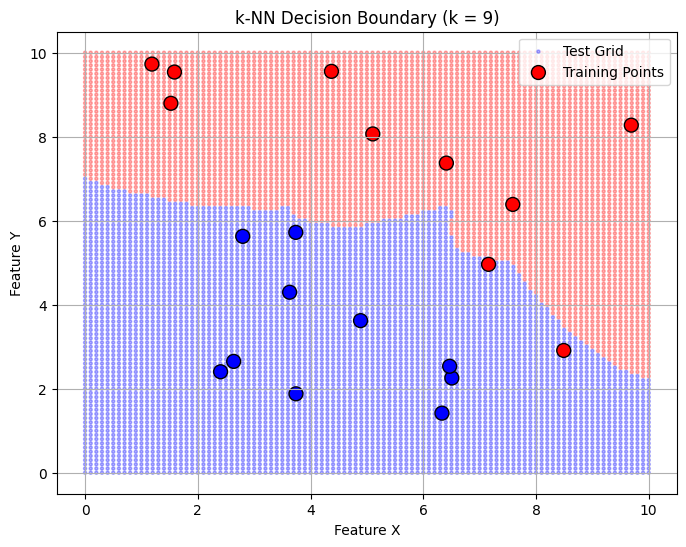

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_training_data(num_points=20, low=1, high=10, seed=42):
    """
    Generate training data of given number of points with values between 'low' and 'high'.
    Labels are assigned based on sum of feature values.
    """
    np.random.seed(seed)
    training_features = np.random.uniform(low, high, size=(num_points, 2))
    training_labels = np.where(training_features[:, 0] + training_features[:, 1] > 10, 1, 0)
    return training_features, training_labels

def generate_test_grid(step=0.1, min_val=0, max_val=10):
    """
    Generate a grid of test points between min_val and max_val with the given step.
    """
    x_values = np.arange(min_val, max_val + step, step)
    y_values = np.arange(min_val, max_val + step, step)
    grid_x, grid_y = np.meshgrid(x_values, y_values)
    test_grid = np.c_[grid_x.ravel(), grid_y.ravel()]
    return test_grid, grid_x, grid_y

def train_and_predict_knn(training_features, training_labels, test_grid, k):
    """
    Train k-NN classifier with given training data and predict on test grid.
    """
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(training_features, training_labels)
    predicted_labels = knn_classifier.predict(test_grid)
    return predicted_labels

def plot_decision_boundary(training_features, training_labels, test_grid, predicted_labels, k):
    """
    Plot the decision boundary for k-NN based on predicted labels.
    """
    plt.figure(figsize=(8, 6))

    # Plot test grid with predicted class colors
    plt.scatter(
        test_grid[:, 0], test_grid[:, 1],
        c=['blue' if label == 0 else 'red' for label in predicted_labels],
        s=5, alpha=0.3, label='Test Grid'
    )

    # Plot training points with true class labels
    plt.scatter(
        training_features[:, 0], training_features[:, 1],
        c=['blue' if label == 0 else 'red' for label in training_labels],
        edgecolor='k', s=100, label='Training Points'
    )

    plt.title(f'k-NN Decision Boundary (k = {k})')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.grid(True)
    plt.legend()
    plt.show()

# Main Program

# Generate training data
X_train, y_train = generate_training_data()

# Generate testing grid
X_test, _, _ = generate_test_grid()

# Try different values of k and results
k_values_to_try = [1, 3, 5, 7, 9]
for k_val in k_values_to_try:
    y_test_pred = train_and_predict_knn(X_train, y_train, X_test, k_val)
    plot_decision_boundary(X_train, y_train, X_test, y_test_pred, k_val)


A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.

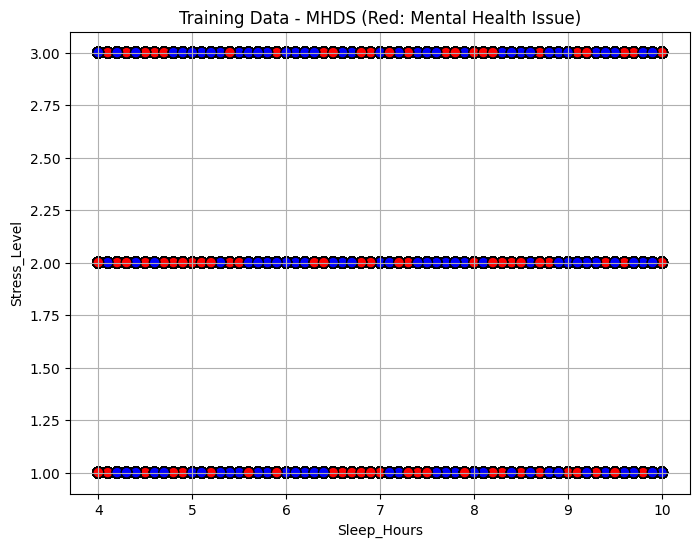

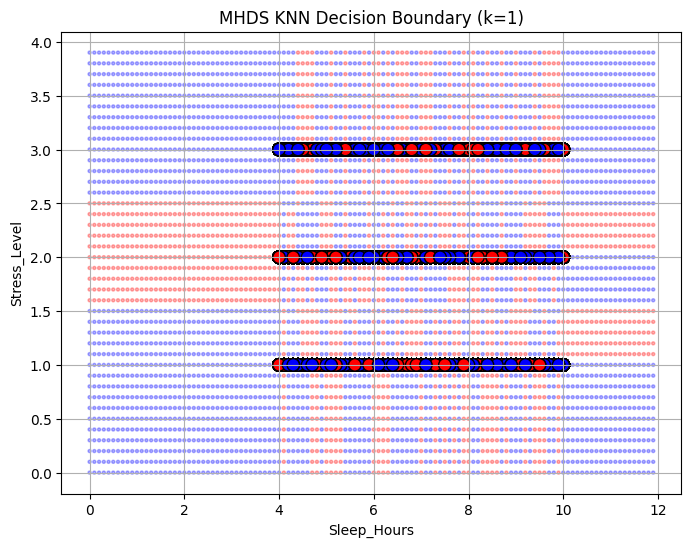

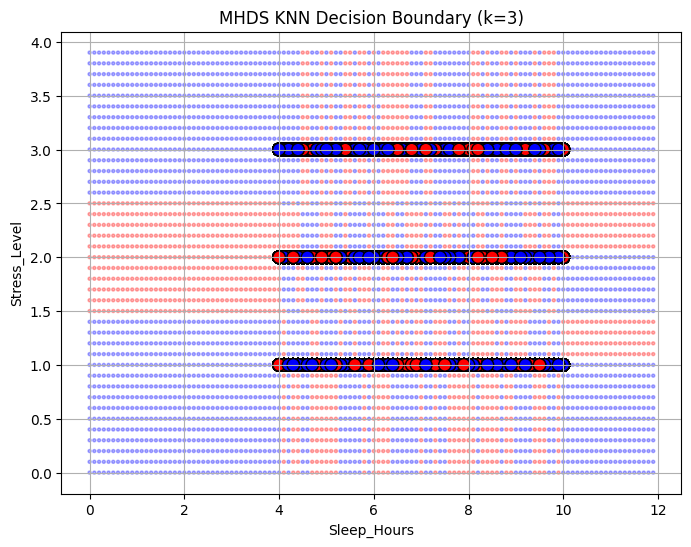

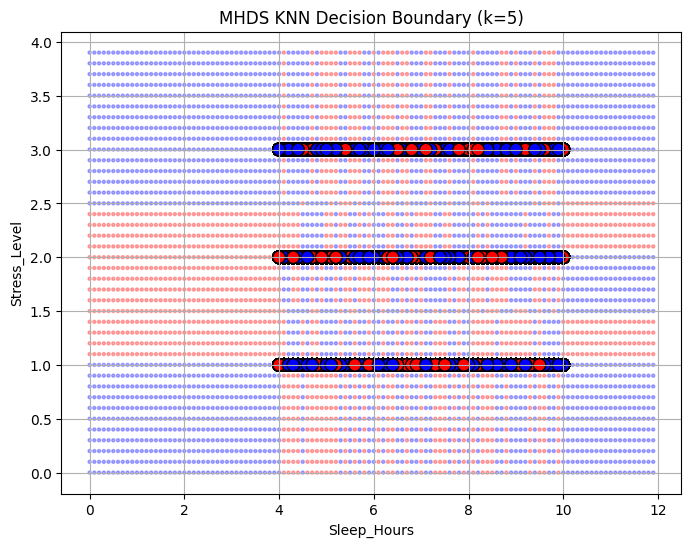

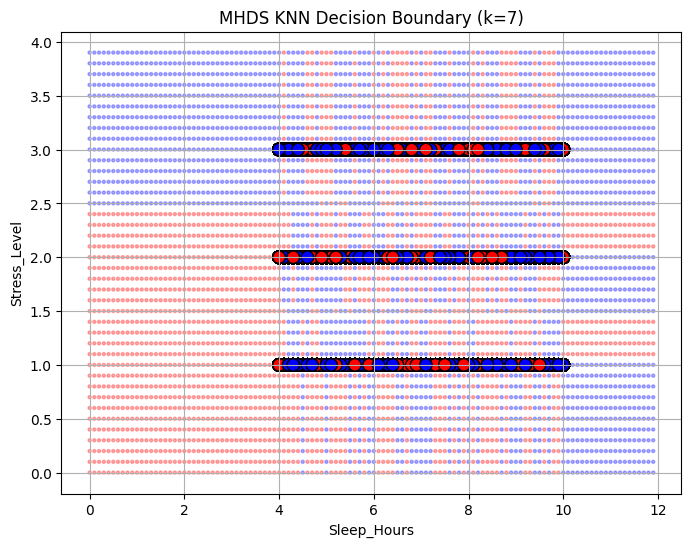

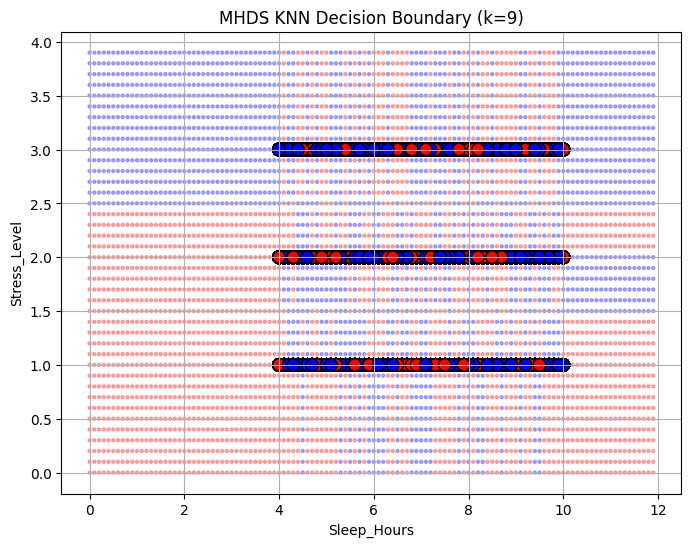

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load and preprocess
df = pd.read_csv('MHDS.csv')

# Select features and target
features = ['Sleep_Hours', 'Stress_Level']
target = 'Mental_Health_Condition'

# Drop missing values
df = df[features + [target]].dropna()

# Map 'Stress_Level' (Low, Medium, High) to numbers
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level'] = df['Stress_Level'].map(stress_map)

# Encode target (Yes = 1, No = 0)
df[target] = LabelEncoder().fit_transform(df[target])

# Extract data
X_train = df[features].values
y_train = df[target].values

# A3: Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=['blue' if y == 0 else 'red' for y in y_train], s=60, edgecolor='k')
plt.xlabel('Sleep_Hours')
plt.ylabel('Stress_Level')
plt.title('Training Data - MHDS (Red: Mental Health Issue)')
plt.grid(True)
plt.show()

#  A4 & A5: Generate test grid and apply KNN
x_min, x_max = 0, 12
y_min, y_max = 0, 4
x_vals = np.arange(x_min, x_max, 0.1)
y_vals = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x_vals, y_vals)
X_test = np.c_[xx.ravel(), yy.ravel()]

k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=['blue' if p == 0 else 'red' for p in y_pred], s=5, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=['blue' if l == 0 else 'red' for l in y_train], edgecolor='k', s=80)
    plt.title(f'MHDS KNN Decision Boundary (k={k})')
    plt.xlabel('Sleep_Hours')
    plt.ylabel('Stress_Level')
    plt.grid(True)
    plt.show()


A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your kNN classifier. This is called hyper-parameter tuning.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# Load dataset
df = pd.read_csv('MHDS.csv')
# Select 2 features and target
features = ['Sleep_Hours', 'Stress_Level']
target = 'Mental_Health_Condition'
# Drop missing rows
df = df[features + [target]].dropna()
# Encode categorical feature 'Stress_Level'
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level'] = df['Stress_Level'].map(stress_map)
# Encode target
df[target] = LabelEncoder().fit_transform(df[target])
# Prepare features and target
X = df[features].values
y = df[target].values
# Define model
knn = KNeighborsClassifier()
# Define parameter grid for 'k'
param_grid = {'n_neighbors': list(range(1, 21))}
# Use GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
# Display best k and its score
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Best k value: 1
Best cross-validation accuracy: 0.5015
